## Regresión logística

In [200]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


In [201]:
# Data extracted from https://archive.ics.uci.edu/ml/datasets/Glass+Identification
df_headers = ["Id", "RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe", "glass-type"]
df = pd.read_csv("glass.data", names = df_headers)
'''
1. Id number: 1 to 214
2. RI: refractive index
3. Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
4. Mg: Magnesium
5. Al: Aluminum
6. Si: Silicon
7. K: Potassium
8. Ca: Calcium
9. Ba: Barium
10. Fe: Iron
11. Type of glass: (class attribute)
-- 1 building_windows_float_processed
-- 2 building_windows_non_float_processed
-- 3 vehicle_windows_float_processed
-- 4 vehicle_windows_non_float_processed (none in this database)
-- 5 containers
-- 6 tableware
-- 7 headlamps
'''


'\n1. Id number: 1 to 214\n2. RI: refractive index\n3. Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)\n4. Mg: Magnesium\n5. Al: Aluminum\n6. Si: Silicon\n7. K: Potassium\n8. Ca: Calcium\n9. Ba: Barium\n10. Fe: Iron\n11. Type of glass: (class attribute)\n-- 1 building_windows_float_processed\n-- 2 building_windows_non_float_processed\n-- 3 vehicle_windows_float_processed\n-- 4 vehicle_windows_non_float_processed (none in this database)\n-- 5 containers\n-- 6 tableware\n-- 7 headlamps\n'

In [202]:
df.head()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass-type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [203]:
df["glass-type"].unique()

array([1, 2, 3, 5, 6, 7])

In [204]:
categories = ('building_windows_float_processed','building_windows_non_float_processed','vehicle_windows_float_processed','containers','tableware','headlamps')

Text(0, 0.5, 'Na')

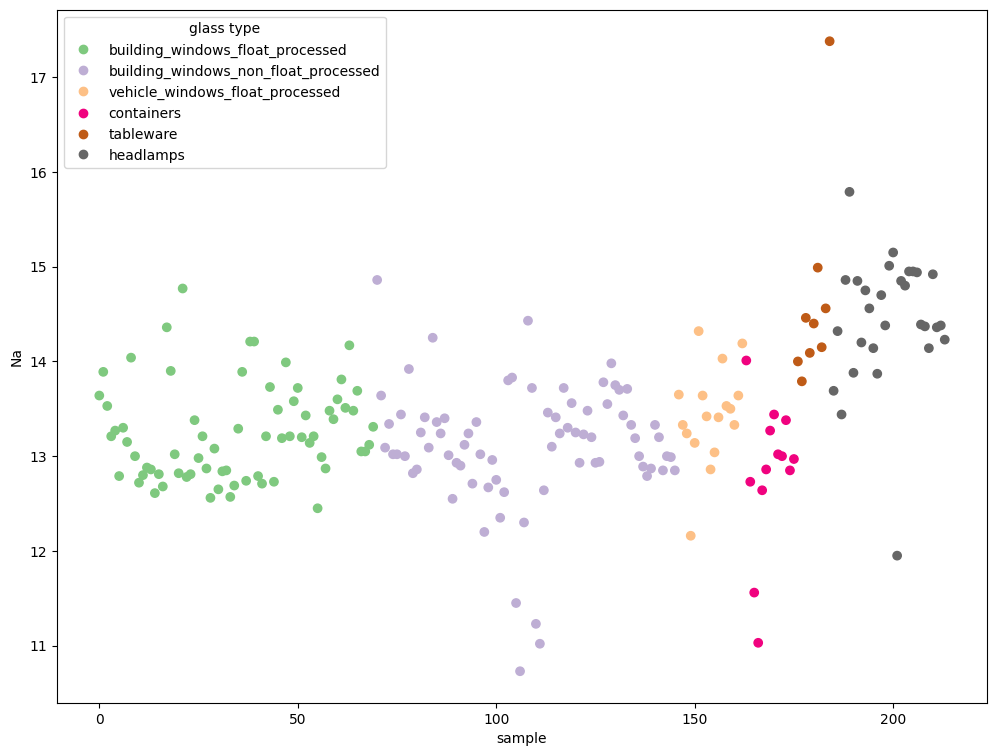

In [205]:
plt.figure(figsize=(12,9))
scatter = plt.scatter(df.index, df["Na"], c = df["glass-type"], cmap = 'Accent')
plt.legend(handles = scatter.legend_elements()[0],
           labels = categories,
           title  ="glass type")
plt.xlabel("sample")
plt.ylabel("Na")

In [206]:
'''Separa X e y usando iloc'''
# Separo la "y"
y= df.iloc[:,-1]

In [207]:
# Separo la "x"
X = df.iloc[:,df.columns != "glass-type"]
X.head()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [208]:
from scipy.sparse import random
'''
Busca en internet train_test_split y divide X e y en Entrenamiento y Test: X_train, X_test, y_train, y_test
con 70% para entrenamiento y 30% para test
'''
X_train, X_test, y_train, y_test = train_test_split(X, y ,train_size= 0.70 ,test_size = 0.30, random_state=40)

In [209]:
'''Crea un modelo de regresión logística y entrénalo'''
modelo = linear_model.LogisticRegression(max_iter=5000)

In [210]:
#Entrenamiento del modelo:
modelo.fit(X_train, y_train)

LogisticRegression(max_iter=5000)

In [211]:
'''Haz predicciones para X_test'''
#X_test = np.array(X_test)
Y_test_pred= modelo.predict(X_test)
Y_test_pred

array([2, 1, 6, 5, 5, 1, 2, 1, 7, 1, 2, 3, 1, 2, 2, 2, 1, 2, 7, 1, 1, 3,
       3, 2, 2, 7, 2, 2, 1, 5, 1, 2, 7, 1, 1, 2, 6, 2, 1, 2, 2, 3, 2, 6,
       2, 2, 2, 7, 3, 2, 1, 2, 2, 2, 1, 2, 7, 1, 1, 3, 2, 7, 1, 2, 1])

In [212]:
'''y calcula la exactitud del modelo con metrics.accuracy_score() para X_test'''
accuracy = accuracy_score(y_test, Y_test_pred)
accuracy

0.9692307692307692

In [213]:
y_train_pred = modelo.predict(X_train)
y_train_pred

array([3, 2, 1, 2, 2, 1, 2, 7, 1, 1, 1, 1, 2, 2, 1, 1, 1, 7, 1, 2, 1, 1,
       3, 6, 2, 1, 1, 1, 2, 1, 1, 2, 6, 2, 7, 5, 7, 2, 1, 5, 2, 5, 2, 5,
       2, 2, 1, 3, 2, 1, 1, 7, 1, 1, 7, 1, 1, 2, 2, 2, 1, 1, 7, 2, 2, 5,
       1, 7, 1, 1, 3, 5, 2, 1, 3, 1, 2, 2, 7, 7, 2, 2, 7, 7, 1, 7, 2, 1,
       2, 1, 2, 1, 2, 7, 1, 7, 2, 3, 2, 2, 2, 7, 1, 2, 2, 2, 2, 1, 5, 5,
       2, 5, 1, 1, 1, 6, 7, 2, 3, 7, 2, 2, 1, 7, 2, 2, 1, 3, 6, 1, 7, 6,
       1, 2, 2, 7, 1, 2, 3, 1, 2, 2, 1, 7, 1, 6, 5, 1, 2])

In [214]:
'''y calcula la exactitud del modelo con metrics.accuracy_score() para X_train'''

accuracy2 = accuracy_score(y_train, y_train_pred)
accuracy

0.9692307692307692